In [63]:
import pandas as pd
from tqdm import tqdm
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# import cross_validation
from sklearn.model_selection import StratifiedKFold
# import load mnist 
from keras.datasets import mnist


import sys
sys.path.append('../mlrose')
from mlrose_hiive import NeuralNetwork, LogisticRegression
import cv2

In [64]:
(_, _), (test_X, test_y) = mnist.load_data()
X = test_X
y = test_y

In [68]:
y_one_hot = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

In [76]:
# Split data into training and test sets
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=True)
train_index, test_index = list(skf.split(X, y))[0]
X_train = X[train_index]
X_test = X[test_index]
y_train = y[train_index]
y_test = y[test_index]
y_train_one_hot = y_one_hot[train_index]
y_test_one_hot = y_one_hot[test_index]

In [126]:
nn_model = NeuralNetwork(
    hidden_nodes = [10], activation ='relu', 
    # algorithm='gradient_descent', 
    algorithm='random_hill_climb', 
    max_iters = 1000, bias = True, is_classifier = True, 
    learning_rate = 10, early_stopping = True, clip_max = 50, max_attempts = 100, 
    random_state = 1, curve=True)
nn_model.fit(X_train, y_train_one_hot)

NeuralNetwork(clip_max=50, curve=True, early_stopping=True, hidden_nodes=[10],
              learning_rate=10, max_attempts=100, max_iters=1000,
              random_state=1)

In [122]:
i = 100
nn_model.predict(X_test[i:i+1])
print(y_test_one_hot[i:i+1])
print(y_test[i:i+1])
print(nn_model.predicted_probs.shape)
print(nn_model.predicted_probs)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]
(1, 10)
[[0.00000000e+000 1.06421537e-182 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.00000000e+000 0.00000000e+000]]


In [123]:
nn_model.loss

17.070235792565864

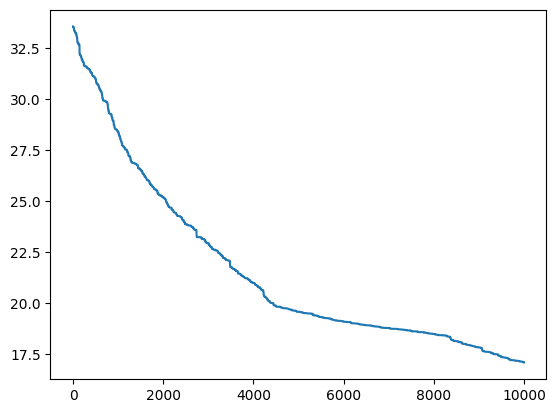

In [124]:
plt.plot(nn_model.fitness_curve[:, 0])
# plt.plot(nn_model.fitness_curve)

In [125]:
nn_model.score(X_test, y_test_one_hot)

0.4958008398320336

In [ ]:
# Split data into training and test sets
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=True)
for i, (train_index, test_index) in enumerate(skf.split(X, y_one_hot.argmax(axis=1))):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y_one_hot[train_index]
    y_test = y_one_hot[test_index]

    # Initialize neural network object and fit object - attempt 1
    nn_model = NeuralNetwork(
        hidden_nodes = [2], activation ='relu', algorithm ='random_hill_climb', 
        max_iters = 1000, bias = True, is_classifier = True, 
        learning_rate = 0.0001, early_stopping = True, clip_max = 5, max_attempts = 100, 
        random_state = i, curve=True)
    curve = nn_model.fit(X_train, y_train)